In [90]:
# import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import glob
import datetime

In [91]:
# download all ERA5 data
file_new = 'ERA5data.nc'
DS_variables =xr.open_dataset(file_new)

u10 = DS_variables['u10']
v10 = DS_variables['v10']
t2m = DS_variables['t2m']
tp = DS_variables['tp']
sst = DS_variables['sst']

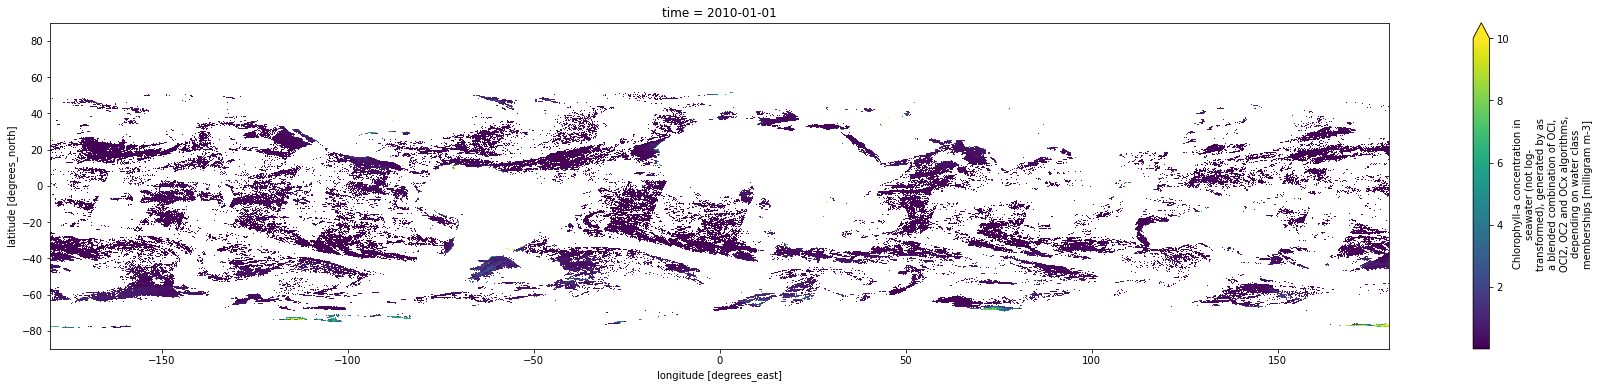

In [154]:
file_new = 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100101-fv5.0.1.nc'
DS_chloro =xr.open_dataset(file_new)
chlor_a = DS_chloro['chlor_a']
chlor_a[0,:,:].plot(vmax=10)
# u10 = DS_variables['u10']
# v10 = DS_variables['v10']
# t2m = DS_variables['t2m']
# tp = DS_variables['tp']
# sst = DS_variables['sst']

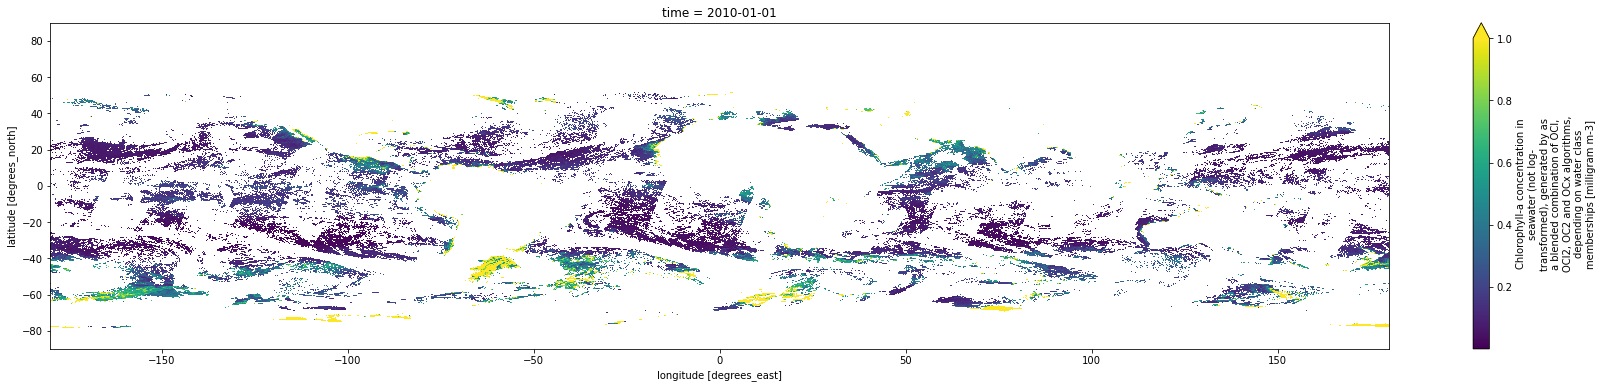

In [155]:
chlor_a[0,:,:].plot(vmax=1)

In [92]:
MJO_indices = pd.read_csv('mjo_data.csv',header=None, index_col=False)
# # pre-processing MJO indices
MJO_indices_renamed = MJO_indices.rename(columns={0: "year", 1: "month", 2: "day", 3: "none", 4: "PCA1", 5:"PCA2", 6:"PCA1_PCA2"})
MJO_timeframe = MJO_indices_renamed[(MJO_indices_renamed['year'] >= 2010)].reset_index() 
MJO_timeframe

,index,year,month,day,none,PCA1,PCA2,PCA1_PCA2
0,11323,2010,1,1,0,1.49653,0.88504,1.73865
1,11324,2010,1,2,0,1.22264,0.98477,1.56991
2,11325,2010,1,3,0,0.90425,1.08474,1.41221
3,11326,2010,1,4,0,0.55380,1.17877,1.30238
4,11327,2010,1,5,0,0.18629,1.26029,1.27398
...,...,...,...,...,...,...,...,...
4378,15701,2021,12,27,0,-0.70756,0.47105,0.85002
4379,15702,2021,12,28,0,-0.65159,0.47253,0.80489
4380,15703,2021,12,29,0,-0.55501,0.44320,0.71026
4381,15704,2021,12,30,0,-0.42160,0.38602,0.57163


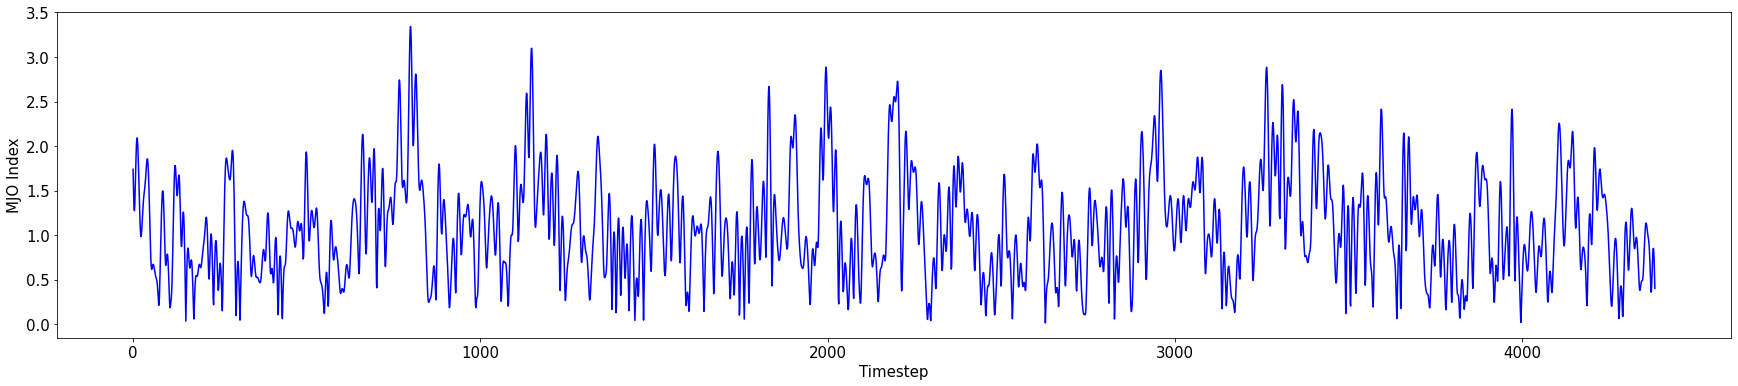

In [149]:
plt.rcParams["figure.figsize"] = (30,6)
plt.plot(np.arange(len(MJO_timeframe)),MJO_timeframe['PCA1_PCA2'],c='blue')
plt.ylabel('MJO Index',fontsize=15); plt.xlabel('Timestep',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.show()

In [96]:
MJO_timeframe['datetime'] = MJO_timeframe[MJO_timeframe.columns[1:4]].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
MJO_timeframe['datetime'] = pd.to_datetime(MJO_timeframe['datetime'], format='%Y-%m-%d')    

In [134]:
# we notice that u10, v10, t2m, and tp has 3653. We notice that the MJO data has more. We can combine by index.
print(MJO_timeframe['datetime'][0])
print(MJO_timeframe['datetime'][4017:])

2010-01-01 00:00:00
4017   2020-12-31
4018   2021-01-01
4019   2021-01-02
4020   2021-01-03
4021   2021-01-04
          ...    
4378   2021-12-27
4379   2021-12-28
4380   2021-12-29
4381   2021-12-30
4382   2021-12-31
Name: datetime, Length: 366, dtype: datetime64[ns]


In [132]:
print(u10[-1:])
print(u10[0])

<xarray.DataArray 'u10' (time: 1, latitude: 101, longitude: 161)>
array([[[-8.370280e-03,  4.389508e-01, ...,  9.250426e-02, -9.353495e-02],
        [ 3.190588e-01,  4.530070e-01, ..., -1.596823e-01, -3.432410e-01],
        ...,
        [ 1.897011e+01,  1.735033e+01, ..., -1.361909e+00, -1.334623e+00],
        [ 1.707582e+01,  1.584300e+01, ..., -1.158596e-01, -1.332143e+00]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -160.0 -159.8 -159.5 ... -120.5 -120.2 -120.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 35.5 35.25 35.0
  * time       (time) datetime64[ns] 2020-12-31
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component
<xarray.DataArray 'u10' (latitude: 101, longitude: 161)>
array([[-0.917069, -0.029868,  0.858159, ...,  0.442258,  0.639046,  0.838315],
       [-0.204332,  0.201647,  0.655583, ..., -0.903012, -0.512743, -0.16547 ],
       [ 0.043721,  0.285985,  0.382725, ..., -0.876554, -0.930298, -1.206463],
     

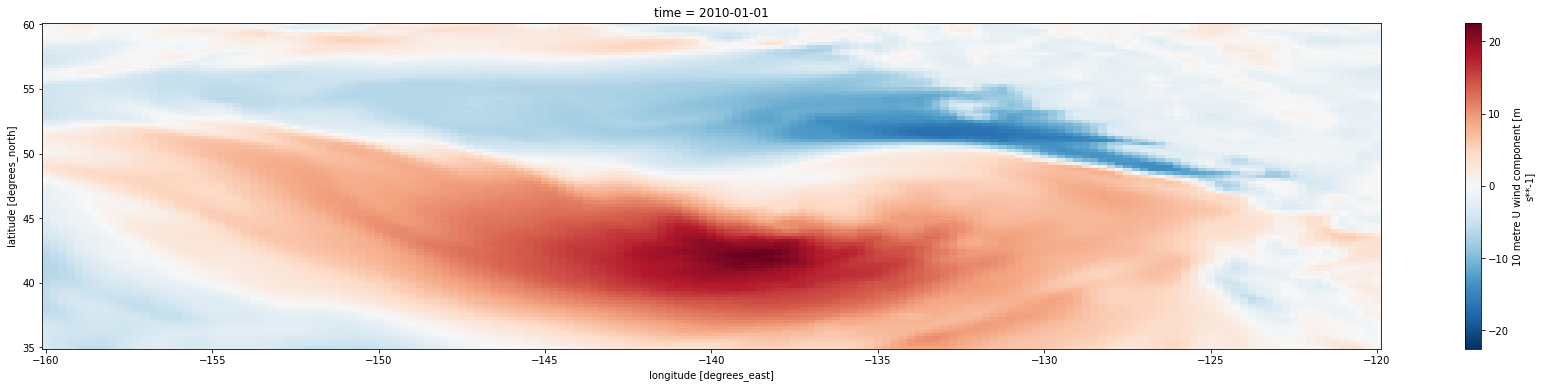

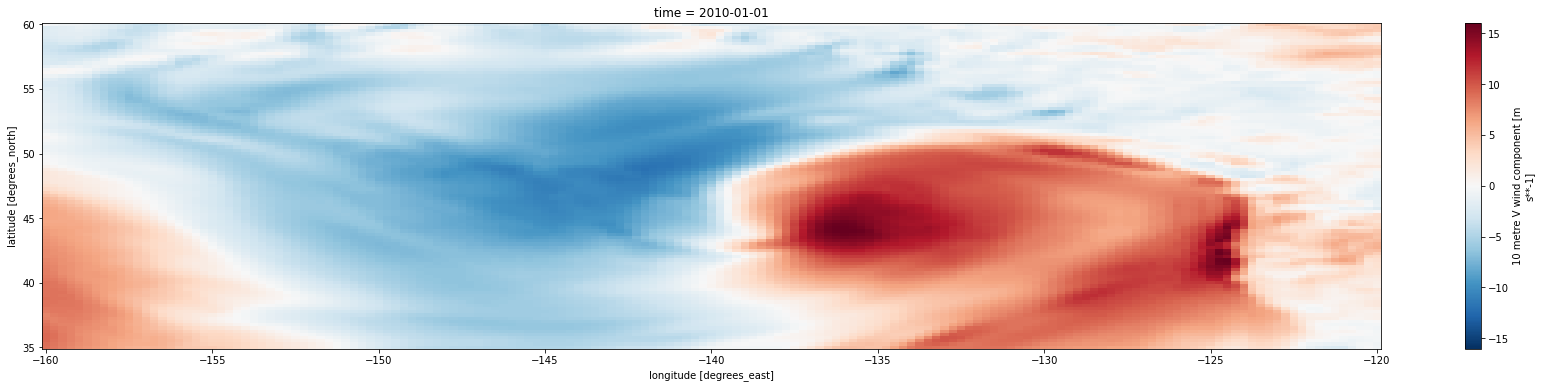

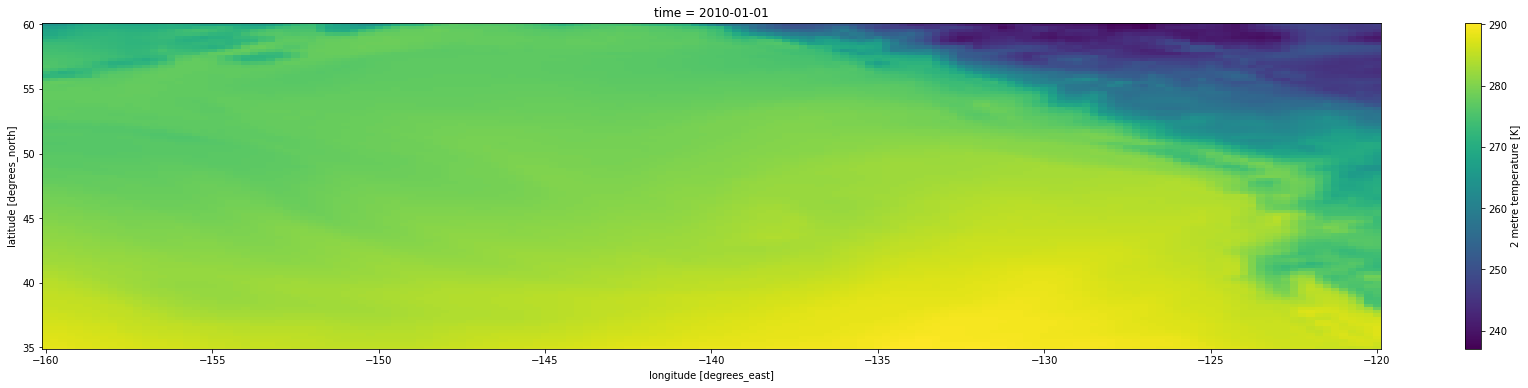

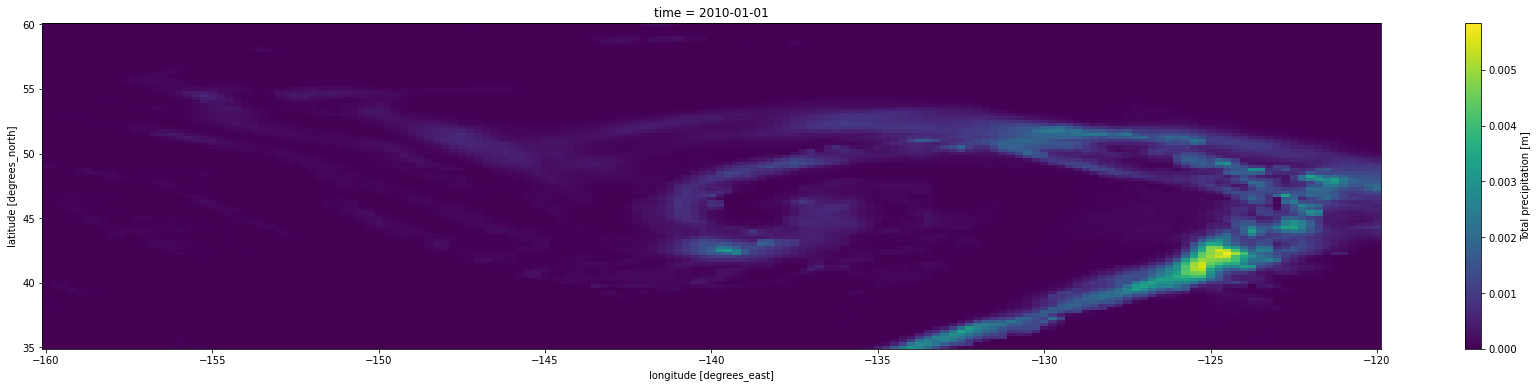

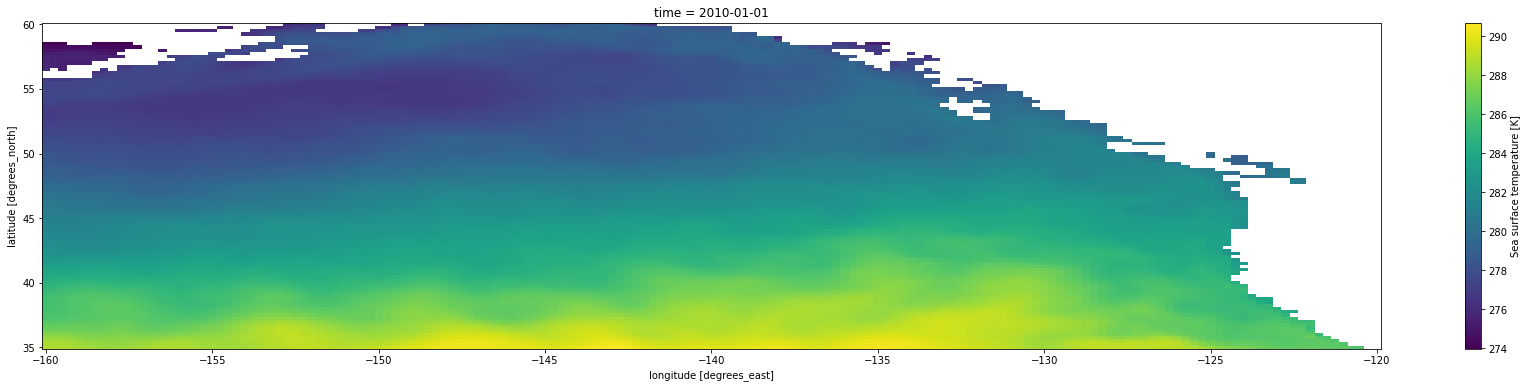

In [101]:
u10[0,:,:].plot()
plt.show()
v10[0,:,:].plot()
plt.show()
t2m[0,:,:].plot()
plt.show()
tp[0,:,:].plot()
plt.show()
sst[0,:,:].plot()
plt.show()

In [125]:
means_tp = []; means_u10 = []; means_v10 = []; means_t2m = []; means_sst = []

for time in range(len(u10)):
    means_tp.append(np.nanmean(tp[time,:,:]))
    means_u10.append(np.nanmean(u10[time,:,:]))
    means_v10.append(np.nanmean(v10[time,:,:]))
    means_t2m.append(np.nanmean(t2m[time,:,:]))
    means_sst.append(np.nanmean(sst[time,:,:]))

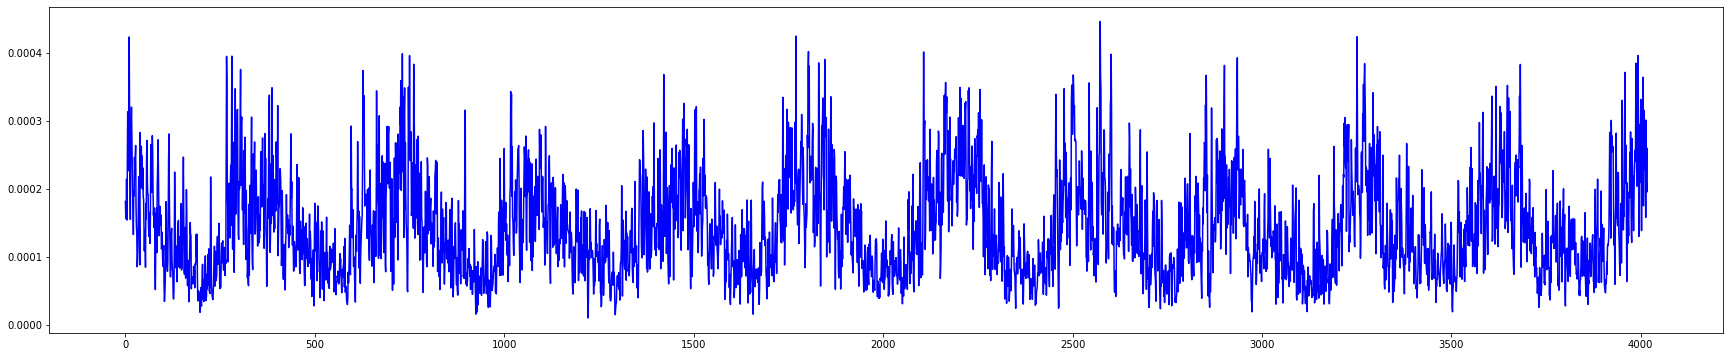

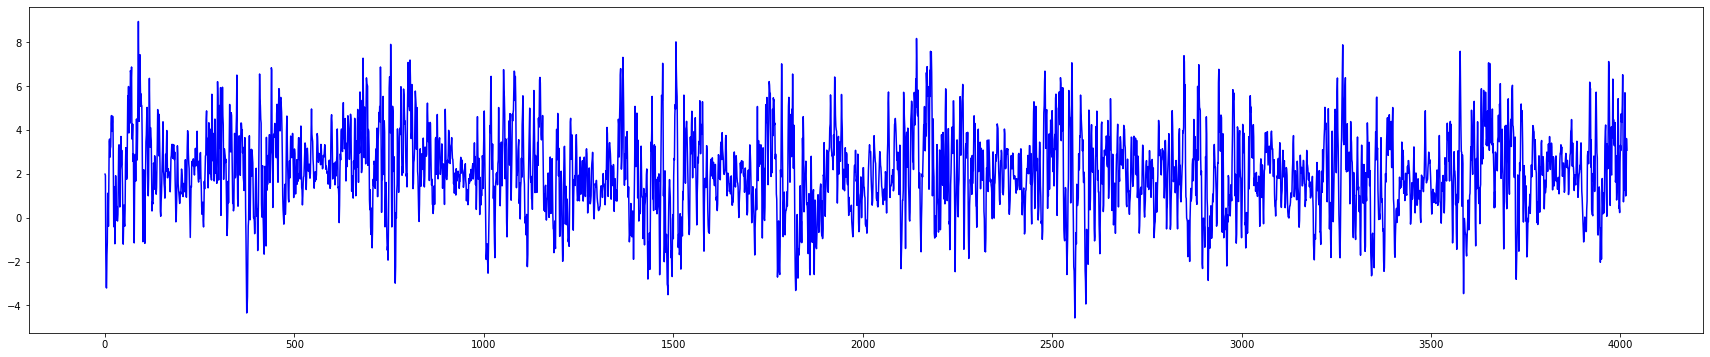

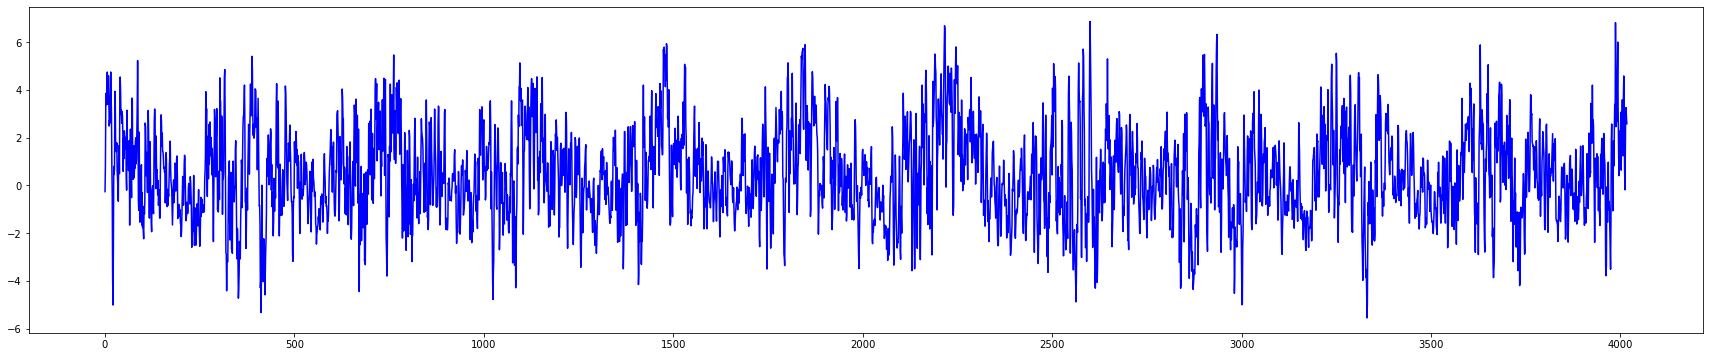

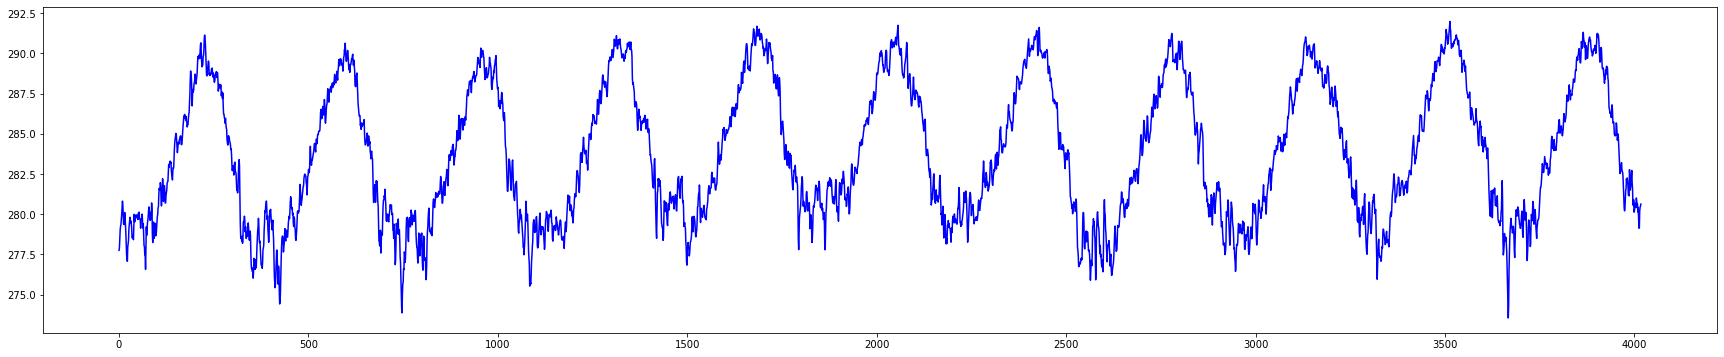

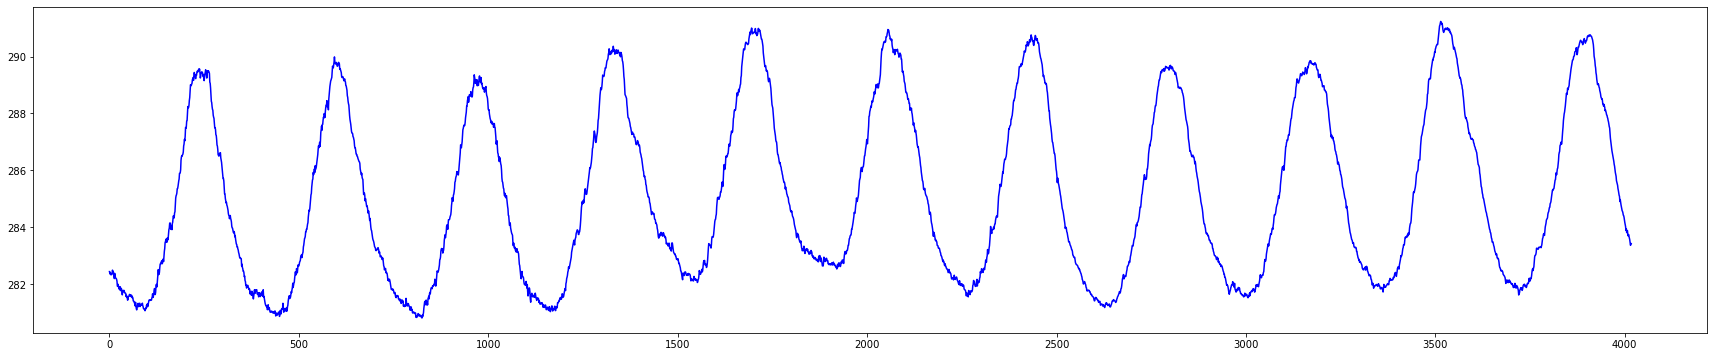

In [148]:
plt.plot(np.arange(len(means_tp)),means_tp, c='blue')
plt.show()

plt.plot(np.arange(len(means_u10)),means_u10,c='blue')
plt.show()

plt.plot(np.arange(len(means_v10)),means_v10,c='blue')
plt.show()

plt.plot(np.arange(len(means_t2m)),means_t2m,c='blue')
plt.show()

plt.plot(np.arange(len(means_sst)),means_sst,c='blue')
plt.show()

In [136]:
print(len(means_tp))
print(len(MJO_timeframe['PCA1_PCA2'][:4018]))

4018
4018


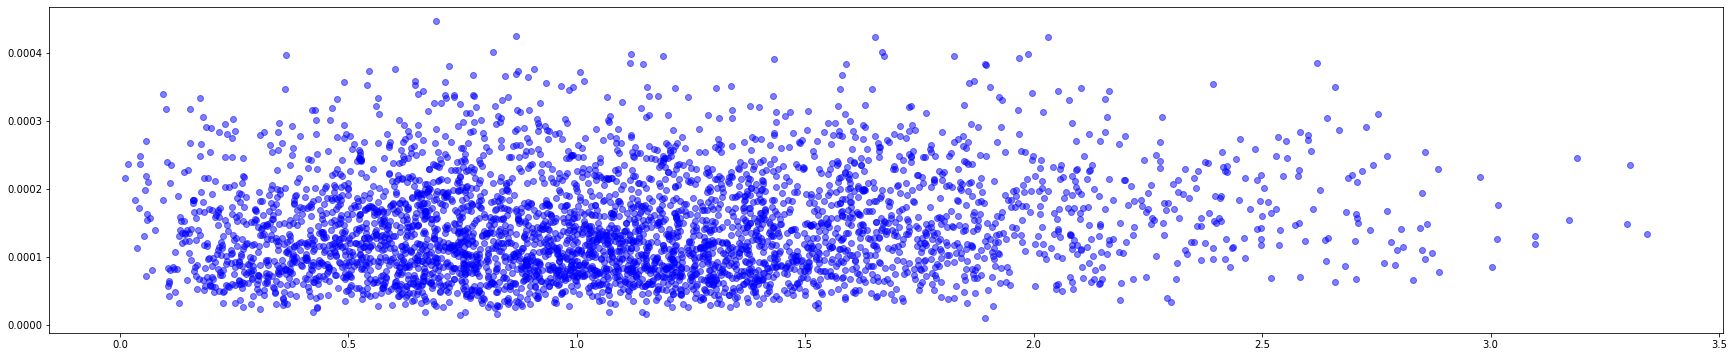

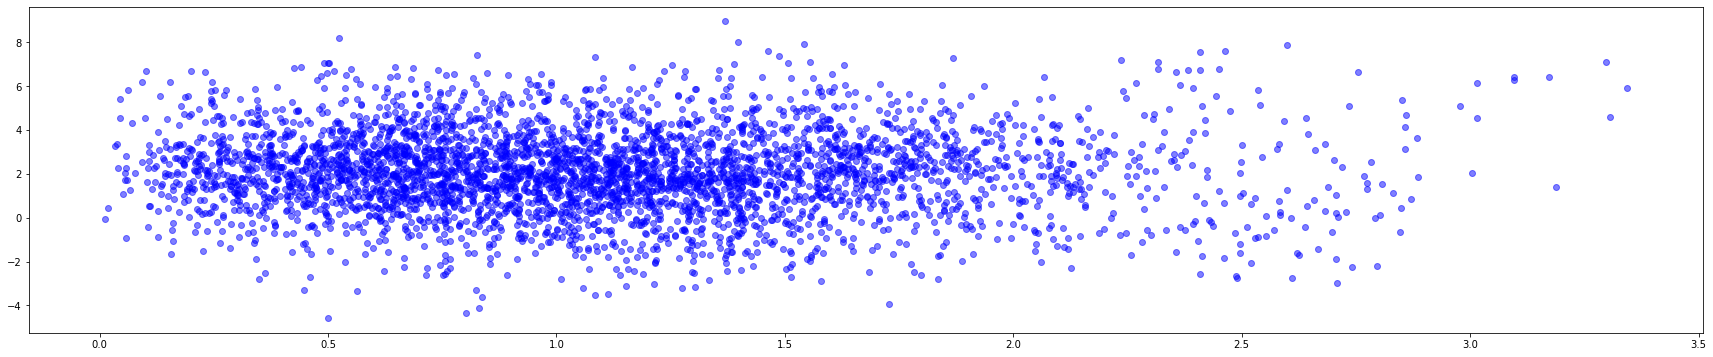

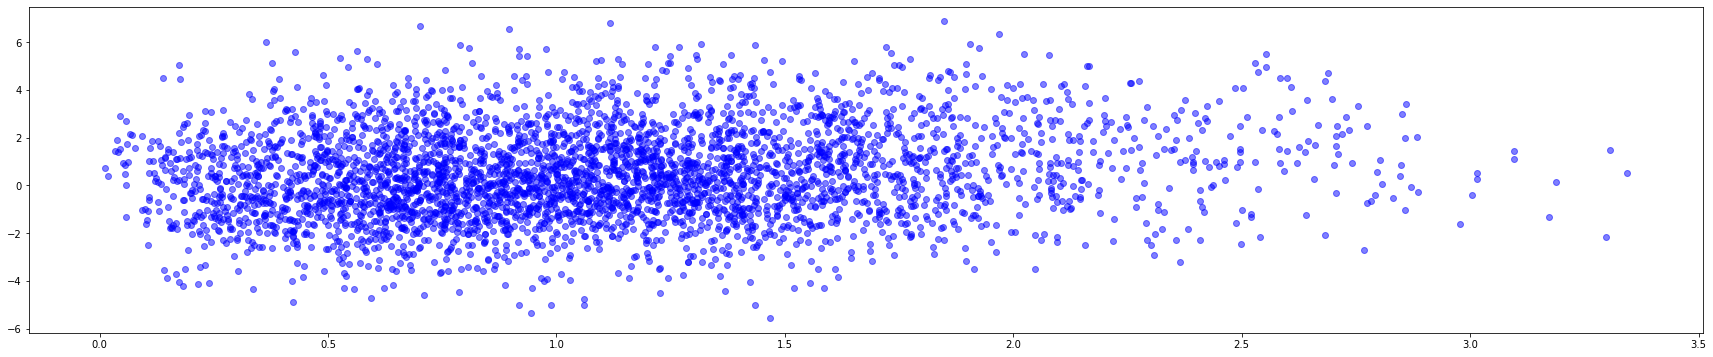

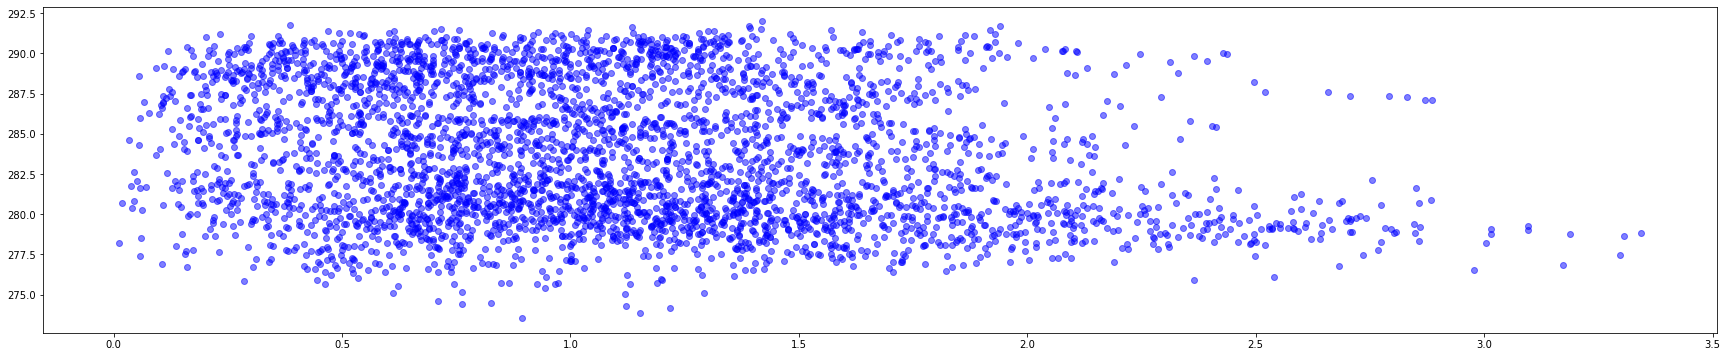

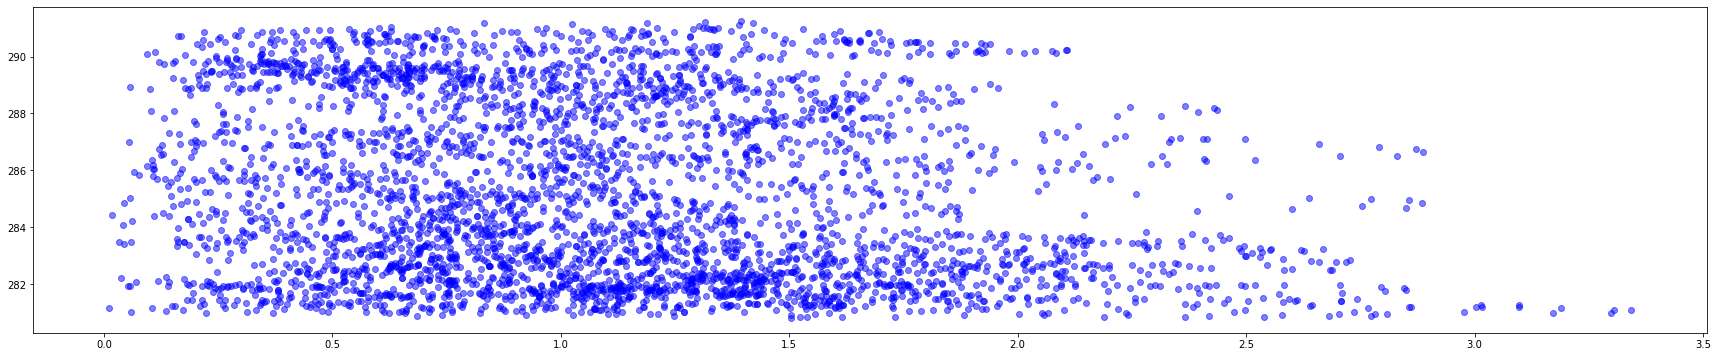

In [146]:
plt.scatter(MJO_timeframe['PCA1_PCA2'][:4018], means_tp, alpha=0.5, c='blue')
plt.show()
plt.scatter(MJO_timeframe['PCA1_PCA2'][:4018], means_u10, alpha=0.5, c='blue')
plt.show()
plt.scatter(MJO_timeframe['PCA1_PCA2'][:4018], means_v10, alpha=0.5, c='blue')
plt.show()
plt.scatter(MJO_timeframe['PCA1_PCA2'][:4018], means_t2m, alpha=0.5, c='blue')
plt.show()
plt.scatter(MJO_timeframe['PCA1_PCA2'][:4018], means_sst, alpha=0.5, c='blue')
plt.show()